<a href="https://colab.research.google.com/github/jugernaut/ProgramacionEnParalelo/blob/main/Introduccion/05_ModelosMatem%C3%A1ticos_SCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Modelos Matemáticos</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón</i></h5>
    <h5 align="center"><i>Ayudante: Andrea Fernanda Muñiz Patiño</i></h5>
  <h5 align="center"><i>Materia: Seminario de programación en paralelo</i></h5>
  </font>

# Introducción

Recordemos como se calcula el polinomio de Lagrange con $n+1$ nodos de interpolación, ya que para la construcción de la derivada numérica es muy ilustrativo.

$$P\left(x\right)=\sum_{i=0}^{n}L_{i}(x)f(x_{i})$$

## Construcción de la aproximación mediante Lagrange

Se define la Formula de Derivación Numérica para aproximar $f'\left(x_{*}\right)$ sobre los nodos de interpolación $\left\{ x_{0},x_{1},\ldots,x_{n}\right\}$ 

$$f'\left(x_{*}\right)\approx\sum_{i=0}^{n}C_{i}f(x_{i})$$

Donde $C_{i}$ son los coeficientes o pesos de la formula. Es decir $C_{i}=L_{i}^{'}\left(x_{*}\right)$, con $L_{i}$ los respectivos coeficientes del polinomio de Lagrange.

## Definición

Sea $f\left(x\right)$ una función derivable en $x_{*}$ y dada la formula de derivación numérica para aproximar $f'\left(x_{*}\right)$ sobre los nodos $\left\{ x_{0},x_{1},\ldots,x_{n}\right\}$  donde 

$$f'\left(x_{*}\right)\approx f_{*}^{'}=\sum_{i=0}^{n}C_{i}f(x_{i})$$

El error de truncamiento de la aproximación de la derivada para la función $f\left(x\right)$ en el punto $x_{*}$ esta dado por

$$E_{f}\left(x_{*}\right)=f'\left(x_{*}\right)-f_{*}^{'}$$

## Construcción de la aproximación mediante Newton

Sean los puntos $\left\{ x_{0},x_{1}\right\}$ , el polinomio interpolador de Newton de $f\left(x\right)$ esta dado por 

$$f\left(x\right)\approx P_{1}\left(x\right)=f\left(x_{0}\right)+\frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}}\left(x-x_{0}\right)=f\left(x_{0}\right)+\frac{x\left(f\left(x_{1}\right)-f\left(x_{0}\right)\right)}{x_{1}-x_{0}}-\frac{x_{0}\left(f\left(x_{1}\right)-f\left(x_{0}\right)\right)}{x_{1}-x_{0}}$$

Dado que ya calculamos $P_{1}\left(x\right)$ basta encontrar una aproximación de $f'\left(x_{*}\right)$ mediante la formula de derivación numérica

$$f'\left(x_{0}\right)\approx P_{1}^{'}\left(x_{0}\right)=\frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}} \tag{1}$$

Si definimos $h=x_{1}-x_{0}$ y substituimos en (1) 

$$f'\left(x_{0}\right)\approx P_{1}^{'}\left(x_{0}\right)=\frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h} \tag{2}$$

A la ecuación (2) se le conoce como **diferencia hacia adelante**, ya que toma $x_{0}$ y el siguiente punto $x_{1}$ para aproximar la derivada. 

Por otro lado si se toman los puntos $x_{0}$ y su antecesor, la ecuación (1) se transforma en 

$$f'\left(x_{0}\right)\approx P_{1}^{'}\left(x_{0}\right)=\frac{f\left(x_{0}\right)-f\left(x_{0}-h\right)}{h} \tag{3}$$

A la ecuación (3) se le conoce como **diferencia hacia atrás**, ya que toma $x_{0}$ y el punto anterior para aproximar la derivada. 

Estas 2 formas de calcular la 1er. derivada en un punto empleando el polinomio de Newton son útiles, pero aun hace falta tener más precisión en los cálculos. 


## Construcción de la aproximación mediante Taylor

Recordando la expansión en series de Taylor alrededor del punto $x_{i}$, con $x_{i+1}=x_i+h$ tenemos

$$f\left(x_{i+1}\right)=f\left(x_{i}\right)+f'\left(x_{i}\right)(x_{i+1}-x_{i})+\frac{f''\left(x_{i}\right)(x_{i+1}-x_{i})^{2}}{2!}+\cdots$$

### Diferencias hacia adelante

Como $h=x_{i+1}-x_{i}$ y usando los 2 primeros términos de la serie, se tiene

$$f\left(x_{i+1}\right)=f\left(x_i\right)+hf'\left(x_i\right)+\frac{h^{2}}{2}f''\left(x_i\right) \tag{4}$$

Al despejar $f'\left(x\right)$ 

$$hf'\left(x_i\right)=f\left(x_{i+1}\right)-f\left(x_i\right)-\frac{h^{2}}{2}f''\left(x_i\right)$$
$$\Longrightarrow f'\left(x_i\right)=\frac{f(x_{i+1})-f(x_i)}{h}-\frac{h}{2}f''\left(x_i\right)$$

Como el último termino de la ecuación anterior es proporcional a $h$, el error es del orden de $h$ 

$$\therefore f'\left(x_{i}\right)=\frac{f\left(x_{i+1}\right)-f\left(x_{i}\right)}{h}+O\left(h\right) \tag{5}$$

La ecuación (5) es otra forma de construir la **diferencias finitas hacia adelante**.

### Diferencias hacia atrás

Por otro lado, podemos aproximar la derivada empleando un punto hacia atrás, mediante el siguiente desarollo.

$$f\left(x_{i-1}\right)=f\left(x_i\right)-hf'\left(x_i\right)+\frac{h^{2}}{2}f''\left(x_i\right) \tag{6}$$

$$f'\left(x_{i}\right)=\frac{f\left(x_{i}\right)-f\left(x_{i-1}\right)}{h}+O\left(h\right) \tag{7}$$

A la ecuación (7) se le conoce como **diferencias finitas hacia atrás**.

### Diferencias centradas

Ahora, si tomamos los primeros 4 terminos de las ecuaciones (4) y (6) y los restamos, tenemos que.

$$f\left(x_{i+1}\right)=f\left(x_i\right)+hf'\left(x_i\right)+\frac{h^{2}}{2}f''\left(x_i\right) \tag{4}$$

$$f\left(x_{i-1}\right)=f\left(x_i\right)-hf'\left(x_i\right)+\frac{h^{2}}{2}f''\left(x_i\right) \tag{6}$$

$$f\left(x_{i+1}\right)-f\left(x_{i-1}\right)=f(x_i)+hf'(x_i)+\frac{h^{2}}{2}f''(x_i)+\frac{h^{3}}{6}f'''(x_i)-f(x_i)+hf'(x_i)-\frac{h^{2}}{2}f''(x_i)+\frac{h^{3}}{6}f'''(x_i)$$

$$ \Longrightarrow f(x+h)-f(x-h)=2hf'(x)+2\frac{h^{3}}{6}f'''(x)$$

Al despejar $f'(x)$, tenemos que.

$$2hf'(x)=f(x+h)-f(x-h)-2\frac{h^{3}}{6}f'''(x)$$

$$f'(x)=\frac{f(x+h)-f(x-h)-2\frac{h^{3}}{6}f'''(x)}{2h}$$

$$f'\left(x\right)=\frac{f(x_{i+h})-f(x)}{h}-\frac{h}{2}f''\left(x\right)$$

$$\therefore f'\left(x_{i}\right)=\frac{f\left(x_{i+1}\right)-f\left(x_{i-1}\right)}{2h}+O\left(h^{2}\right)$$

### Ejemplo

Sea la función $f(x)=\ln x$ y $x_{0}=1.8$ aproxime la derivada de $f\left(x_{0}\right)$

**Solución**: 

Empleando la diferencia hacia adelante.

$$\frac{f\left(1.8+h\right)-f\left(1.8\right)}{h}$$

Esta definición, nos ayuda a aproximar $f'\left(1.8\right)$, los resultados de la siguiente tabla se dan con distintos tamaños de paso $h$.

| h| $f\left(1.8+h\right)$ |  $\frac{f\left(1.8+h\right)-f\left(1.8\right)}{h}$| error|
| :-:  | :-: | :-: |  :-: | 
| 0.1  | 0.64185389	|0.540672200000	|0.0154321|
| 0.01 | 0.59332685	|0.55401800000	|0.0015432|
| 0.001	|0.58834207	|0.55540130000	|0.0001543|

# Diferencias Finitas

Como se dijo desde el principio del curso, la idea del mismo es, que uds. como estudiantes tengan la capacidad de abstracción para poder modelar algún fenómeno de su interés y con base en este modelo, encontrar una solución numérica al mismo.

Dicha solución numérica, representa la solución al problema que inicialmente se quería analizar y mediante esta solución se pueden tomar decisiones.

Estos modelos matemáticos en ciencia e ingeniería generalmente toman la forma de ecuaciones diferenciales.

Algunos de estos modelos se muestran a continuación.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/yacimiento.PNG?raw=1" width="500">
</center>

$$\frac{\delta}{\delta t}\left(\frac{\Phi S_{w}}{B_{w}}\right)=\nabla\cdot\left(T_{w}\left[\nabla p_{w}-\rho_{w}\vec{g}\right]\right)+\frac{qWs}{B_{w}}$$

$$\frac{\delta}{\delta t}\left(\frac{\Phi S_{o}}{B_{o}}\right)=\nabla\cdot\left(T_{o}\left[\nabla p_{o}-\rho_{o}\vec{g}\right]\right)+\frac{qOs}{B_{o}}$$

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/dinamica.PNG?raw=1" width="500">
</center>

$$\frac{\delta\rho}{\delta t}+\frac{\delta}{\delta x_{j}}\left[\rho u_{j}\right]=0$$

$$\frac{\delta}{\delta t}\left(\rho u_{i}\right)+\frac{\delta}{\delta x_{j}}\left[\rho u_{i}u_{j}+p\delta_{ij}-\tau_{ji}\right]=0,\quad i=1,2,3$$

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/estru.PNG?raw=1" width="500">
</center>

$$\nabla\cdot\sigma+F=\rho\frac{\delta^{2}u}{\delta t^{2}}$$

$$\varepsilon=\frac{1}{2}\left[\nabla u+\left(\nabla u\right)\right]$$

$$\sigma=C:\varepsilon$$

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/equi.PNG?raw=1" width="500">
</center>

$$\delta x=\delta B-5x\,\delta t$$



## Motivación

En la mayoría de los modelos solo existen soluciones analíticas para casos sencillos.

Pero el creciente poder de computo ha hecho posible que estos y otros modelos tengan una solución numérica y que puedan ser analizados mas a detalle.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/comp.PNG?raw=1" width="600">
</center>

### Idea Básica

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/disc.PNG?raw=1" width="600">
</center>



## Método de Diferencias Finitas

Definición de derivada

$$f'\left(x\right)=\lim_{\triangle x\rightarrow0}\frac{f\left(x+\triangle x\right)-f\left(x\right)}{\triangle x}$$

Ya se mostró que de esta def. se deriva la formula para aproximar la primera derivada

$$f'\left(x\right)\approx\frac{f\left(x+\triangle x\right)-f\left(x\right)}{\triangle x}$$

Y también se pueden encontrar otras expresiones

$$f'\left(x\right)\approx\frac{f\left(x\right)-f\left(x-\triangle x\right)}{\triangle x}\quad f'\left(x\right)\approx\frac{f\left(x+\triangle x\right)-f\left(x-\triangle x\right)}{2\triangle x}$$

Segunda derivada (Diferencias Finitas Centradas)

$$f''\left(x\right)\approx\frac{f\left(x+2\triangle x\right)-2\triangle f\left(x\right)+f\left(x-2\triangle x\right)}{4\triangle x^{2}}$$

Funciones de múltiples variables

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/ecuaciones.PNG?raw=1" width="600">
</center>

### Ejemplo

Aproximar la solución del problema:

$$\frac{\delta y}{\delta t}\left(t\right)=ay\left(t\right)\quad y\left(0\right)=b\quad t>0$$

Donde a y b son constantes. Solución analítica $y\left(t\right)=be^{at}$

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/dominio.PNG?raw=1" width="600">
</center>

Aplicando diferencias finitas a la ecuación diferencial en $t_{i}$:

$$\frac{y\left(t_{i}+\triangle t\right)-y\left(t_{i}\right)}{\triangle t}=ay\left(t_{i}\right)$$

Con la notación: $y\left(t_{i}\right)=y_{i},\,y\left(t_{i}+\triangle t\right)=y_{i+1}$

$$\frac{y_{i+1}-y_{i}}{\triangle t}=ay_{i}$$

Despejando $y_{i+1}$: 

$$y_{i+1}=y_{i}\left(a\triangle t+1\right)$$

¡Con esta expresión podemos **aproximar la solución**!


Cloning into 'Numerico2021'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 3521 (delta 17), reused 0 (delta 0), pack-reused 3477
Receiving objects: 100% (3521/3521), 43.64 MiB | 34.67 MiB/s, done.
Resolving deltas: 100% (2157/2157), done.


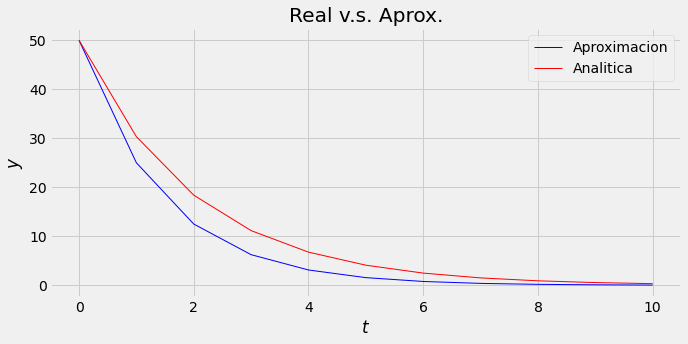

In [ ]:
# bibliotecas
!git clone https://github.com/jugernaut/Numerico2021.git
import numpy as np
import Numerico2021.Utils.gutils as vis

# solucion analitica
def f(t,a,b):
    return b*(np.e)**(a*t)

# funcion que aproxima la solucion
def diferenciasFinitas(a, b, N, xmax):
    # discretizacion del problema
    x = np.linspace(0,xmax,N+1)
    # solucion analitica
    yanalitica = f(x, a, b)
    # calculo de la delta
    delta = float(xmax)/N
    # discretizacion 
    yaprox = np.zeros([N+1])
    # condicion inicial
    yaprox[0] = b
    for i in range(N):
        yaprox[i+1] = yaprox[i]*(a*delta+1)
    return x,yanalitica,yaprox

# graficas
par = [{'title':'Real v.s. Aprox.', 
        'xlabel':'$t$',
        'ylabel':'$y$'}]

graf = vis.planoCartesiano(par=par)

# solucion aproximada
x, yanalitica, yaprox = diferenciasFinitas(-0.5, 50, 10, 10)

#se generan las graficas
graf.plot(x=x, y=yaprox, par={'ls':'-', 'lw':1, 'color':'blue', 'label':'Aproximacion'})
graf.plot(x=x, y=yanalitica, par={'ls':'-', 'lw':1, 'color':'red', 'label':'Analitica'})
graf.legend()

## Esquema Explícito del método de Diferencias Finitas

Aproximar la solución del problema:

$$\frac{\delta T}{\delta t}=K\frac{\delta^{2}T}{\delta x^{2}}\quad0\leq x\leq x_{max}\quad t\geq0 \tag 1$$

$$T\left(x,0\right)=a,\quad T\left(0,t\right)=b,\quad T\left(x_{max},t\right)=c$$

Donde $K,a,b$ y $c$ son constantes, a la ecuación (1) se le conoce como la **ecuación de calor**.

$$Discretizaci\acute{o}n:\begin{cases}
Espacial & \triangle x=\frac{x_{max}}{N_{x}},\quad x_{i}=i\triangle x,\quad i=0,\ldots,N_{x}\\
Temporal & t^{n}=n\triangle t\quad n=0,\ldots,N_{t}
\end{cases}$$

Aplicando diferencias finitas centrales en el espacio y hacia adelante en el tiempo:

$$\frac{T\left(x_{i},t^{n}+\nabla t\right)-T\left(x_{i},t^{n}\right)}{\triangle t}=K\frac{T\left(x_{i+1},t^{n}\right)-2T\left(x,t^{n}\right)+T\left(x_{i-1},t^{n}\right)}{\triangle x^{2}}$$

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/esq2.PNG?raw=1" width="600">
</center>

Usando la notación $T\left(x_{i},t^{n}\right)=T_{i}^{n}$

$$\frac{T_{i}^{n+1}-T_{i}^{n}}{\triangle t}=K\frac{T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}}{\triangle x^{2}}$$

Despejando $T_{i}^{n+1}$

$$T_{i}^{n+1}=T_{i}^{n}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}\right)$$

**Esquema Explícito**: La solución al tiempo $n+1$ solo depende de la solución al tiempo $n$.

Dado que ya sabemos que la solución en el tiempo n+1 esta dada por

$$T_{i}^{n+1}=T_{i}^{n}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}\right)$$

Tiempo 0 (condiciones iniciales): $T_{i}^{0}$

$$T_{i}^{0}=a\quad i=0,\ldots,N_{x}$$

Tiempo 1: $T_{i}^{1}\quad n=0$

$$T_{i}^{1}=T_{i}^{0}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{0}-2T_{i}^{0}+T_{i-1}^{0}\right)$$

Tiempo 1: $T_{i}^{2}\quad n=1$

$$T_{i}^{2}=T_{i}^{1}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{1}-T_{i}^{1}+T_{i-1}^{1}\right)$$

$$ \vdots $$

¿Y que sucede con las condiciones de frontera?

$$T_{i}^{n+1}=T_{i}^{n}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}\right)$$

Se conoce la solución en los puntos $x_{0}=b,\quad x_{N_{x}}=c$

Tiempo 0 (condiciones iniciales): $T_{i}^{0}$

$$T_{0}^{0}=b\quad T_{i}^{0}=a\quad i=0,\ldots,N_{x}-1\quad T_{N_{x}}^{0}=c$$

Tiempo 1: $T_{i}^{1}\quad n=0$

$$T_{0}^{1}=b,\quad T_{i}^{1}=T_{i}^{0}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{0}-2T_{i}^{0}+T_{i-1}^{0}\right)\,i=0,\ldots,N_{x}-1\quad T_{N_{x}}^{1}=c$$

$$ \vdots $$

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/dif.PNG?raw=1" width="600">
</center>


### Resultados del esquema explícito

Tiempo cero.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempocero.PNG?raw=1" width="600">
</center>

Tiempo uno.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempouno.PNG?raw=1" width="600">
</center>

Tiempo 10.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempo10.png?raw=1" width="600">
</center>

Tiempo 30.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempo30.png?raw=1" width="600">
</center>

Tiempo 50.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempo50.png?raw=1" width="600">
</center>

Tiempo 70.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempo70.png?raw=1" width="600">
</center>

Tiempo 90.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempo90.png?raw=1" width="600">
</center>

Tiempo 100.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempo100.png?raw=1" width="600">
</center>

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/DiFini1D.gif?raw=1" width="600">
</center>

Sobre el eje $x$, se tiene los puntos sobre la barra que se quiere simular, sobre el eje $y$, la temperatura que alcanza cada uno de estos puntos. Estos resultados se obtuvieron con los siguientes parámetros:

* $K=e^{-2}$

* $a=323$

* $b=273$

* $c=373$

* $N_{x}=25$

* $\triangle t=0.001$

* $N_{t}=100$

* $xmax=0.5$

¿Que sucede si se incrementa el paso de tiempo, digamos a 0.01?.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/paso_0_01.png?raw=1" width="600">
</center>

Se puede mostrar que este algoritmo es inestable siempre que

$$K\frac{\triangle t}{\triangle x^{2}}>0.5$$

Por lo que el pseudocódigo puede ser modificado, para agregar una sentencia en la cual para poder realizar el proceso de diferencias finitas mediante el esquema explícito, sea necesario que

$$K\frac{\triangle t}{\triangle x^{2}}\leq0.5$$

Es decir,

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/calor1D.PNG?raw=1" width="600">
</center>



## Esquema Implícito del método de Diferencias Finitas

Aproximar la solución del problema:

$$\frac{\delta T}{\delta t}=K\frac{\delta^{2}T}{\delta x^{2}}\quad0\leq x\leq x_{max}\quad t\geq0$$

$$T\left(x,0\right)=a,\quad T\left(0,t\right)=b,\quad T\left(x_{max},t\right)=c$$

Donde K,a,b y c son constantes

$$Discretizaci\acute{o}n:\begin{cases}
Espacial & \triangle x=\frac{x_{max}}{N_{x}},\quad x_{i}=i\triangle x,\quad i=0,\ldots,N_{x}\\
Temporal & t^{n}=n\triangle t\quad n=0,\ldots,N_{t}
\end{cases}$$

Aplicando diferencias finitas centrales en el espacio y hacia atrás en el tiempo:

$$\frac{T\left(x_{i},t^{n}\right)-T\left(x_{i},t^{n}-\triangle t\right)}{\triangle t}=K\frac{T\left(x_{i+1},t^{n}\right)-2T\left(x,t^{n}\right)+T\left(x_{i-1},t^{n}\right)}{\triangle x^{2}}$$

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/expli.PNG?raw=1" width="600">
</center>

Usando la notación $T\left(x_{i},t^{n}\right)=T_{i}^{n}$

$$\frac{T_{i}^{n}-T_{i}^{n-1}}{\triangle t}=K\frac{T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}}{\triangle x^{2}}$$

Pasando del lado izquierdo de la igualdad los términos en el tiempo n

$$-T_{i-1}^{n}+\left(\frac{\triangle x^{2}}{K\triangle t}+2\right)T_{i}^{n}-T_{i+1}^{n}=\frac{\triangle x^{2}}{K\triangle t}T_{i}^{n-1}$$

**Esquema Implícito**: La solución al tiempo $n$ solo depende de la solución al tiempo $n$ y $n-1$.

Esta ecuación en realidad representa un sistema lineal para encontrar $T$ al tiempo $n$.

$$-T_{i-1}^{n}+\left(\frac{\triangle x^{2}}{K\triangle t}+2\right)T_{i}^{n}-T_{i+1}^{n}=\frac{\triangle x^{2}}{K\triangle t}T_{i}^{n-1}$$

$$dT_{1}^{n}-T_{2}^{n}=rT_{1}^{n-1}+b$$

$$-T_{1}^{n}+dT_{2}^{n}-T_{3}^{n}=rT_{2}^{n-1}$$

$$-T_{2}^{n}+dT_{3}^{n}-T_{4}^{n}=rT_{3}^{n-1}$$

$$\vdots$$

$$-T_{N_{x}-3}^{n}+dT_{N_{x}-2}^{n}-T_{N_{x}-1}^{n}=rT_{N_{x}-2}^{n-1}$$

$$-T_{N_{x}-2}^{n}+dT_{N_{x}-1}^{n}=rT_{N_{x}-1}^{n-1}+c$$

Es decir, este sistema es parecido al que se construye para encontrar los coeficientes de la interpolación mediante Splines Cúbicos.

$$\left(\begin{array}{ccccccc}
d & -1 & 0 & 0 & 0 & 0 & 0\\
-1 & d & -1 & \ddots &  &  & \vdots\\
0 & -1 & d & -1 & \ddots &  & \vdots\\
0 &  & \ddots & \cdots &  & \ddots & 0\\
0 &  &  & \ddots & -1 & d & -1\\
0 & \cdots & \cdots & \cdots & \cdots & -1 & d
\end{array}\right)\left(\begin{array}{c}
T_{1}^{n}\\
T_{2}^{n}\\
\vdots\\
T_{N_{x}-1}^{n}
\end{array}\right)=\left(\begin{array}{c}
rT_{1}^{n-1}+b\\
rT_{2}^{n-1}\\
\vdots\\
rT_{N_{x}}^{n-1}+c
\end{array}\right)$$

$$r=\frac{\triangle x^{2}}{K\triangle t},\quad d=r+2$$



### Resultados del esquema implícito

Tiempo cero.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempocero.PNG?raw=1" width="600">
</center>

Tiempo uno.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempouno.PNG?raw=1" width="600">
</center>

Tiempo dos.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempodos.PNG?raw=1" width="600">
</center>

Tiempo tres.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/tiempotres.PNG?raw=1" width="600">
</center>

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/DiFiniImp.gif?raw=1" width="600">
</center>

Estos resultados se obtuvieron con los mismos parámetros del esquema explícito, excepto el paso de tiempo:

* $K=e^{-2}$

* $a=323$

* $b=273$

* $c=373$

* $N_{x}=25$

* $\triangle t=1$

* $N_{t}=100$

* $x_{max}=0.5$

Es evidente que con un paso mayor de tiempo, se puede obtener una simulación mas amplia con menos cálculos.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/EvsI.PNG?raw=1" width="600">
</center>




## Simulación interactiva

En esta celda veremos como se lleva a cabo esta simulación de manera interactiva

In [1]:
import numpy as np
from IPython.html.widgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
from time import time

"""
Método que aproxima la ecuación de calor mediante el esquema explícito
K, difusión de calor
b, condición inicial T(0,0)
c, condición de frontera T(Nx,t)
a, valor toman todoas las x's en el tiempo cero
Nx, variable espacial
Nt, variable temporal
delt, cambios en el tiempo
"""

def ec_calor_exp(K,a,b,c,Nx,delt,Nt,xmax):
    dx=xmax/Nx #Cambios de x                       
    D=K*delt/(dx*dx) #Constante de estabilidad
    T=np.zeros((Nx,Nt)) #Nx renglones, Nt columnas
    T[0][0]=b #Condición inicial
    if (D > 0.5): #Condición de estabilidad
        print("Algoritmo inestable; Terminar") #Termina si no cumple 
    else:
        #Si cumple con la condición encuentra aproximaciones
        for i in range(1,Nx-1): 
            T[i][0]= a #Valores de x al tiempo 0
        T[-1][0]= c #Condición de frontera
        tiempo_ini=time() #Tiempo de ejecución antes de inciar el método
        for n in range(Nt-1):
            T[0][n+1]=b #Se llena la última entrada con la condicion inicial
            for i in range (1,Nx-1):
                #Cálculo de aproximaciones
                T[i][n+1]=T[i][n] + D * (T[i+1][n] - 2*T[i][n] + T[i-1][n]) 
                T[-1][n+1]=c   
        tiempo_fin=time() #Tiempo de ejecución después de terminar el método
        print('Tiempo de ejecución: '+str(tiempo_fin - tiempo_ini))
    return T     #Cada columna representa las temperaturas en el tiempo n  

"""
Método que gráfica la temperatura de cada punto a través del tiempo 
"""
def grafica(mat, xmax, Nx,n):
    disc=np.linspace(0,xmax,Nx) #Discretización
    if n==0: #Gráfica para n=0
        plt.plot(disc,np.zeros(Nx),'r')
        plt.scatter(disc,np.zeros(Nx),c='#8c564b')
        plt.title("Proyecto Final, Modelo de la Ec. de Calor, Tiempo 0")
        plt.show()
    else:
        #Grafica los puntos de cada columna de la matriz mat
        plt.plot(disc,mat[:,n-1],'r')
        plt.scatter(disc,mat[:,n-1],c='#8c564b')        
        plt.title("Diferencias Finitas Ec. de Calor, Tiempo "+str(n))
        plt.show()

#Declaramos las variables 
K=np.e**(-2)
a=323
b=273
c=373
Nx=25 
delt=.001
Nt=100
xmax=0.5

#llama a la implementación del esquema explícito
explicito=ec_calor_exp(K,a,b,c,Nx,delt,Nt,xmax)
@widgets.interact(t=(0, Nt, 1))
def f2(t):
    return grafica(explicito,xmax,Nx,t)

Tiempo de ejecución: 0.008867502212524414


/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(IntSlider(value=50, description='t'), Output()), _dom_classes=('widget-interact',))

## Ecuación de Calor 2D

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/calor2D.PNG?raw=1" width="600">
</center>

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/derivacion/DiFini2D.gif?raw=1" width="700">
</center>

# Anexo

A continuación, se resolverá la siguiente ecuación diferencial, por el método explícito de diferencias finitas.

$$ \frac{\partial G}{\partial t} =\gamma   \frac{\partial G}{\partial x^{2}} \quad , \gamma \in \mathbb{R}  \tag{A.1.}$$

Aplicando el esquema de diferencias finitas hacia delante a $\frac{\partial G}{\partial t}$ y diferencias centradas a $\frac{\partial G}{\partial x^{2}}$, se tiene que 

$$ \frac{G \left(x, t + \Delta t \right)-G \left(x,  t \right)}{\Delta t} = \gamma \frac{G \left(x+\Delta x,  t \right) -2 G \left(x,  t \right)+ G \left(x -\Delta x,  t \right)}{\Delta x ^{2}}$$

Despejando $G \left(x, t + \Delta t \right)$ se obtiene

$$ G \left(x, t + \Delta t \right) = \gamma \frac{\Delta t}{\Delta x^{2}} \{ G \left(x+\Delta x,  t \right)+ G \left(x -\Delta x,  t \right) \}+  \{ 1- 2 \gamma \frac{\Delta t}{\Delta x^{2}} \} G \left(x,  t \right)  $$

entonces 

$$ G \left(x_{i}, t_{j+1} \right) = \gamma \frac{\Delta t}{\Delta x^{2}} \{ G \left(x_{i+1},  t_{j} \right)+ G \left(x_{i-1},  t_{j} \right) \}+  \{ 1- 2 \gamma \frac{\Delta t}{\Delta x^{2}} \} G \left(x_{i},  t_{j} \right)  \tag{A.2.}$$

A la ec (A.2.) se le conoce como esquema explícito.

$\color{blue}{Observaciones}$: 

Si $j=0$ e $i=1$

$$ G \left(x_{1}, t_{1} \right) = \gamma \frac{\Delta t}{\Delta x^{2}} \{ G \left(x_{2},  t_{0} \right)+ G \left(x_{0},  t_{0} \right) \}+  \{ 1- 2 \gamma \frac{\Delta t}{\Delta x^{2}} \} G \left(x_{1},  t_{0} \right)  $$

Si $j=0$ e $i=n$

$$ G \left(x_{n}, t_{1} \right) = \gamma \frac{\Delta t}{\Delta x^{2}} \{ G \left(x_{n+1},  t_{0} \right)+ G \left(x_{n-1},  t_{0} \right) \}+  \{ 1- 2 \gamma \frac{\Delta t}{\Delta x^{2}} \} G \left(x_{n},  t_{0} \right)  $$



# Referencias

1. Yuri N. Skiba: Introducción a los métodos numéricos, Dirección General de Publicaciones U.N.A.M.
2. Ward Cheney, David Kincaid: Métodos Numéricos y Computación, Cenage Learning.
3. Richard L. Burden, J. Douglas Faires: Análisis Numérico, Math Learning.
4. Riswan Butt: Numerical Analysys Using Matlab, Jones and Bartlett.
5. Quarteroni, A, Sacco R.: Numerical mathematics, Springer. 2007.